# 1D Convolutional Neural Network
#### Main Purpose:
Following program demonstrates the effect of applying different filters to a 1D data sequence using a convolution-like process. This kind of operation is used in signal processing, image processing, and data smoothing to extract or enhance specific features from data.

Here's a breakdown of the main purposes:

1. Generate Random Input Data:
   - The program generates a 20x1 array of random integers between 0 and 99. This array serves as the input data to which the filtering operations will be applied.
2. Apply Two Filters:
   - Two filters (filter1 and filter2) are applied to the input data using a sliding window technique.
   - **filter1**: A simple smoothing filter with values [1/2, 0, 1/2].
   - **filter2**: A simple averaging filter with values [1/3, 1/3, 1/3].
3. Perform Convolution-like Operation:
   - The filters are applied to the input data in a sliding window manner, where a window of the same size as the filter is taken from the input, and the dot product of the window and filter is computed. The result is then stored in output arrays.
4. Output the Results:
   - The results of applying filter1 and filter2 are stored in two output arrays (output_data1 and output_data2).

The program prints the original input data alongside the results of the filtered outputs.


input_data	output_data1	output_data2
----------	------------	------------
   51
   92		   32		   52
   14		   82		   59
   71		   37		   48
   60		   46		   50
   20		   71		   54
   82		   53		   63
   86		   78		   81
   74		   80		   78
   74		   80		   78
   87		   86		   87
   99		   55		   70
   23		   50		   41
    2		   22		   15
   21		   27		   25
   52		   11		   25
    1		   70		   47
   87		   15		   39
   29		   62		   51
   37


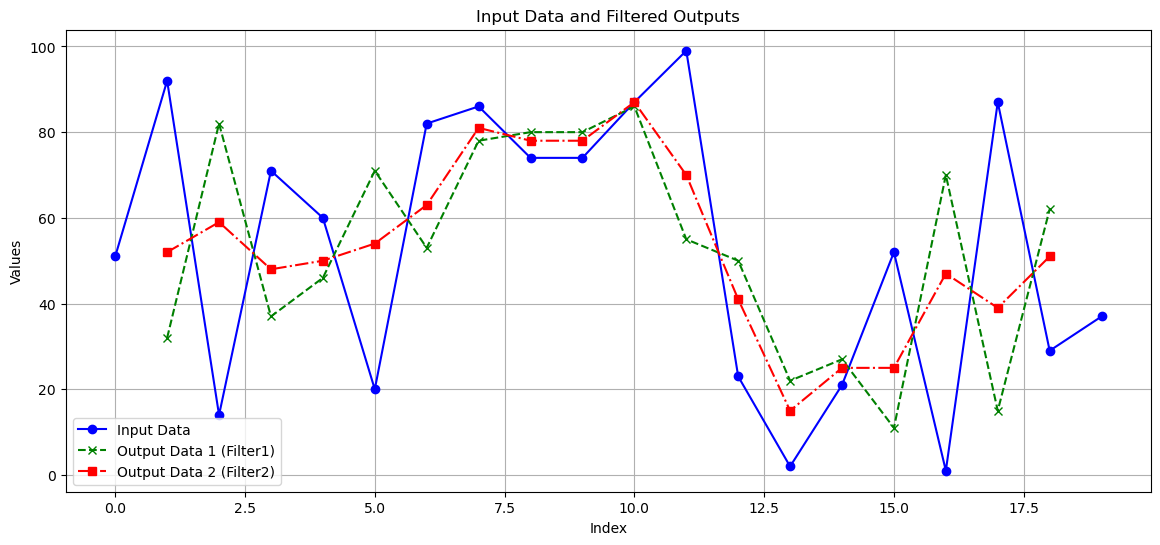

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # Import for plotting

# Set a seed for reproducibility of the random numbers
np.random.seed(42)

# Generate a 20x1 array of random integers between 0 and 99 (inclusive)
input_data = np.random.randint(0, 100, (20, 1))

# Define two filters (kernels) for convolution-like operations
filter1 = np.array([1/2, 0, 1/2])  # Filter with values [1/2, 0, 1/2]
filter2 = np.array([1/3, 1/3, 1/3])  # Filter with values [1/3, 1/3, 1/3]

# Initialize two output arrays to store results, based on the length of the filters
output_data1 = np.zeros((len(input_data) - len(filter1) + 1, 1), dtype=int)  # For filter1 results
output_data2 = np.zeros((len(input_data) - len(filter1) + 1, 1), dtype=int)  # For filter2 results

# Perform convolution-like operations with sliding window using the filters
for i in range(len(input_data) - len(filter1) + 1):
    # Apply filter1 to a slice of input_data and round the result
    output_data1[i] = np.round(np.dot(input_data[i:i+len(filter1)].T, filter1))
    
    # Apply filter2 to a slice of input_data and round the result
    output_data2[i] = np.round(np.dot(input_data[i:i+len(filter2)].T, filter2))

# Print the headers for the output table
print("\ninput_data\toutput_data1\toutput_data2")
print("----------\t------------\t------------")

# Loop through the input data and corresponding output data
for i in range(len(input_data)):
    # For indices where filtered outputs exist, print both input and outputs
    if 0 < i < len(input_data) - 1:
        print(f"{input_data[i][0]:5d}\t\t{output_data1[i-1][0]:5d}\t\t{output_data2[i-1][0]:5d}")
    else:
        # For the first and last elements, only print input data (no output data available)
        print(f'{input_data[i][0]:5d}')

# Function to plot the input data and output data
def plot_data(input_data, output_data1, output_data2):
    plt.figure(figsize=(14, 6))
    
    # Plot input data
    plt.plot(input_data, label='Input Data', marker='o', linestyle='-', color='blue')
    
    # Plot output_data1 and output_data2, with appropriate offset to match input data indices
    plt.plot(range(1, len(output_data1)+1), output_data1, label='Output Data 1 (Filter1)', marker='x', linestyle='--', color='green')
    plt.plot(range(1, len(output_data2)+1), output_data2, label='Output Data 2 (Filter2)', marker='s', linestyle='-.', color='red')
    
    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Input Data and Filtered Outputs')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot function
plot_data(input_data, output_data1, output_data2)

## Using Tensorflow Keras to build 1D CNN

To demonstrate the use of a 1D convolutional layer (Conv1D) from TensorFlow's Keras library on a small dataset of random integers.

Input data shape: (1, 10, 1)
Input data:
 [[[51.]
  [92.]
  [14.]
  [71.]
  [60.]
  [20.]
  [82.]
  [86.]
  [74.]
  [74.]]]
Input shape: (1, 10, 1)
Output shape: (1, 8, 2)
Output:
 tf.Tensor(
[[[ 82.2813    27.953793]
  [ 92.91918   17.901863]
  [ 74.469055  56.739803]
  [ 79.62864   13.120915]
  [ 84.169785  35.88804 ]
  [ 96.48929   73.77406 ]
  [126.19867   50.14236 ]
  [122.171036  44.356384]]], shape=(1, 8, 2), dtype=float32)


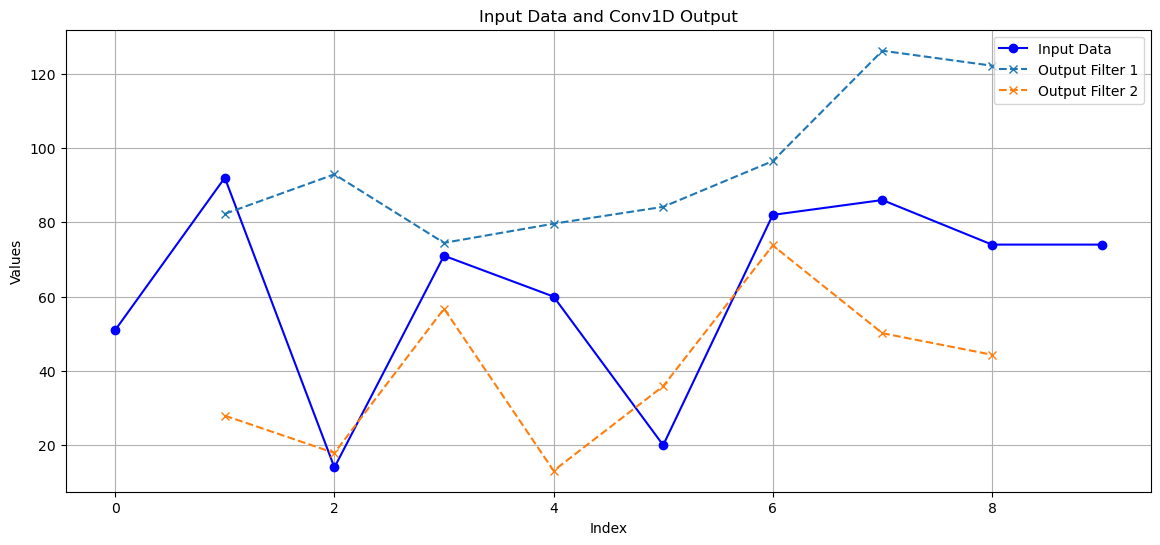

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D
import matplotlib.pyplot as plt  # Import for plotting

# Set a seed for reproducibility of the random numbers
np.random.seed(42)

# Generate a 20x1 array of random integers between 0 and 99 (inclusive)
input_data = np.array([np.random.randint(0, 100, (10, 1))], dtype=np.float32)
print("Input data shape:", input_data.shape)
print("Input data:\n", input_data)

# Define a Conv1D layer with dilation_rate = 1 (regular convolution)
conv1d_layer = Conv1D(filters=2, kernel_size=3, strides=1, padding='valid', dilation_rate=1)

# Apply the Conv1D layer to the input data
output = conv1d_layer(input_data)

# Print the input and output shapes
print("Input shape:", input_data.shape)  # (1, 10, 1)
print("Output shape:", output.shape)     # Output shape depends on padding and dilation rate
print("Output:\n", output)

# Function to plot the input data and the output data from Conv1D layer
def plot_conv1d(input_data, output_data):
    input_data = input_data.squeeze()  # Remove the batch and channel dimensions for plotting
    output_data = output_data.numpy().squeeze()  # Convert TensorFlow tensor to NumPy array and squeeze

    plt.figure(figsize=(14, 6))
    
    # Plot input data
    plt.plot(input_data, label='Input Data', marker='o', linestyle='-', color='blue')

    # Plot each filter's output from the Conv1D layer
    for i in range(output_data.shape[1]):
        plt.plot(range(1, len(output_data)+1), output_data[:, i], label=f'Output Filter {i+1}', linestyle='--', marker='x')

    # Add labels and title
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Input Data and Conv1D Output')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the plot function
plot_conv1d(input_data, output)

#### Add Max-pooling layer

Input data shape: (1, 100, 1)
Conv1D Output shape: (1, 98, 2)
Max Pooling Output shape: (1, 49, 2)


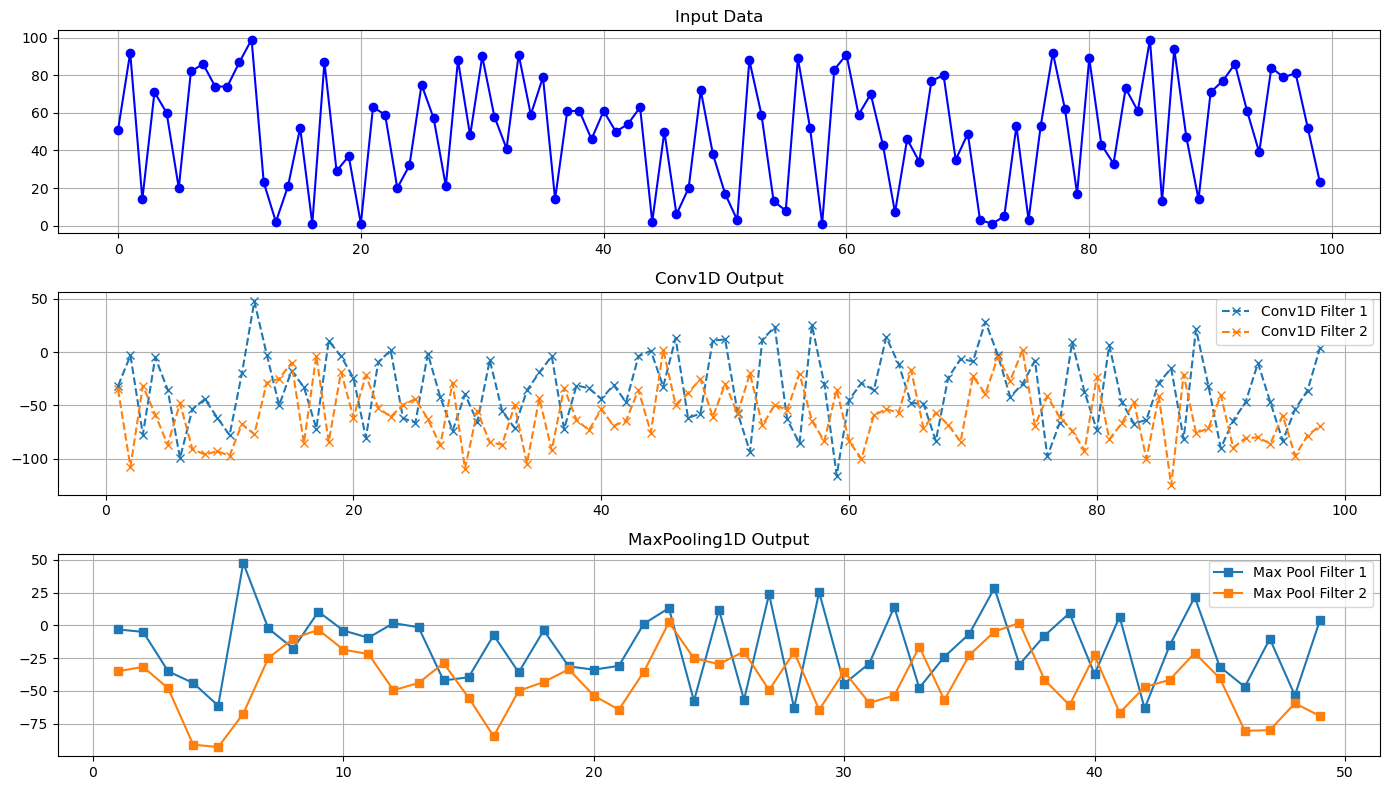

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D
import matplotlib.pyplot as plt  # Import for plotting

# Set a seed for reproducibility of the random numbers
np.random.seed(42)

# Generate a 100x1 array of random integers between 0 and 99 (inclusive)
input_data = np.array([np.random.randint(0, 100, (100, 1))], dtype=np.float32)
print("Input data shape:", input_data.shape)
# print("Input data:\n", input_data)

# Define a Conv1D layer with dilation_rate = 1 (regular convolution)
conv1d_layer = Conv1D(filters=2, kernel_size=3, strides=1, padding='valid', dilation_rate=1)

# Apply the Conv1D layer to the input data
conv_output = conv1d_layer(input_data)

# Add a MaxPooling1D layer to reduce the dimensionality
max_pool_layer = MaxPooling1D(pool_size=2, strides=2, padding='valid')

# Apply the MaxPooling layer to the Conv1D output
max_pool_output = max_pool_layer(conv_output)

# Print the input and output shapes
print("Conv1D Output shape:", conv_output.shape)   # After convolution
print("Max Pooling Output shape:", max_pool_output.shape)  # After max-pooling

# Function to plot the input data, Conv1D output, and Max-Pooling output
def plot_conv1d_maxpool(input_data, conv_output, max_pool_output):
    input_data = input_data.squeeze()  # Remove the batch and channel dimensions for plotting
    conv_output = conv_output.numpy().squeeze()  # Convert TensorFlow tensor to NumPy array and squeeze
    max_pool_output = max_pool_output.numpy().squeeze()  # Squeeze max-pooling output

    plt.figure(figsize=(14, 8))
    
    # Plot input data
    plt.subplot(3, 1, 1)
    plt.plot(input_data, label='Input Data', marker='o', linestyle='-', color='blue')
    plt.title('Input Data')
    plt.grid(True)
    
    # Plot Conv1D output for each filter
    plt.subplot(3, 1, 2)
    for i in range(conv_output.shape[1]):
        plt.plot(range(1, len(conv_output)+1), conv_output[:, i], label=f'Conv1D Filter {i+1}', linestyle='--', marker='x')
    plt.title('Conv1D Output')
    plt.legend()
    plt.grid(True)
    
    # Plot MaxPooling1D output for each filter
    plt.subplot(3, 1, 3)
    for i in range(max_pool_output.shape[1]):
        plt.plot(range(1, len(max_pool_output)+1), max_pool_output[:, i], label=f'Max Pool Filter {i+1}', linestyle='-', marker='s')
    plt.title('MaxPooling1D Output')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_conv1d_maxpool(input_data, conv_output, max_pool_output)

#### Test average-pooling layer

Input data shape: (1, 100, 1)
Conv1D Output shape: (1, 98, 2)
Average Pooling Output shape: (1, 49, 2)


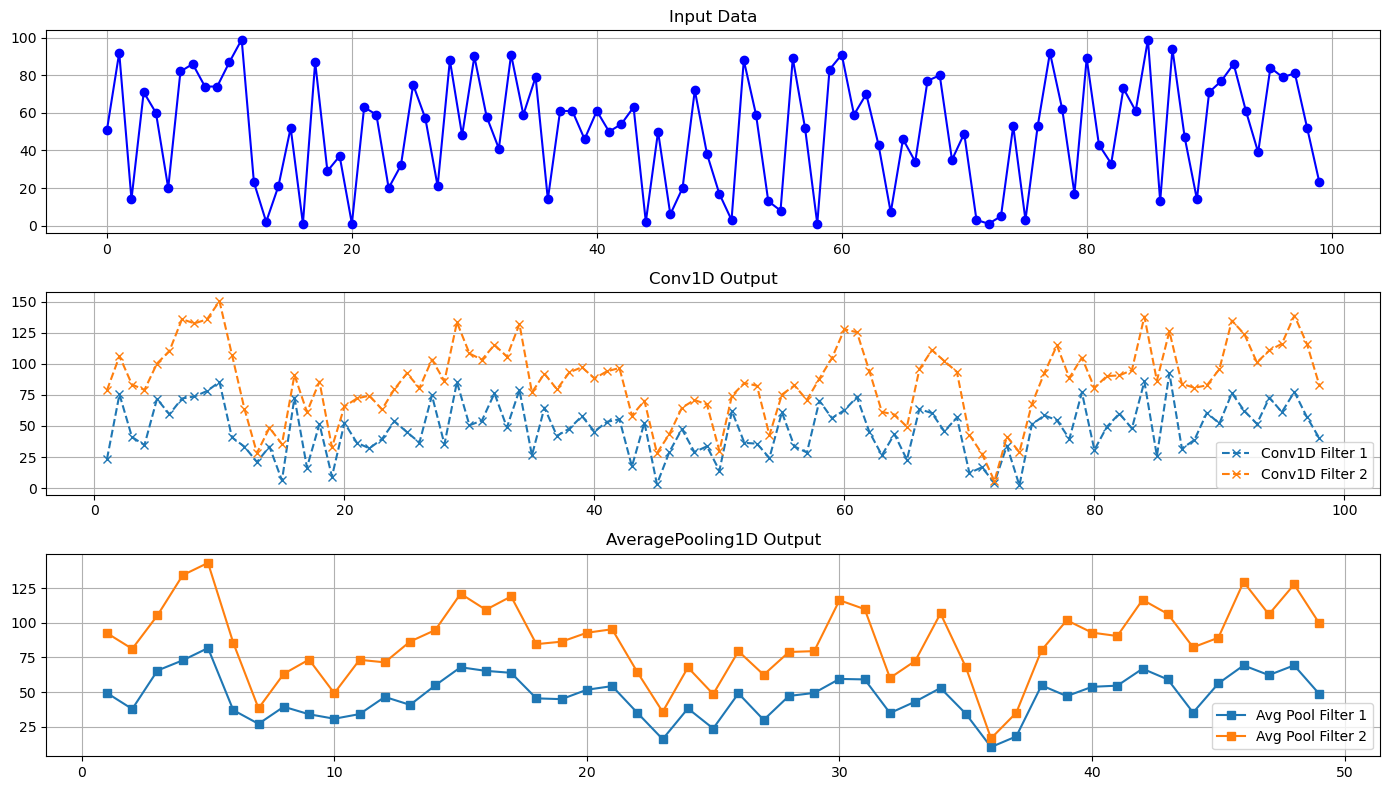

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, AveragePooling1D
import matplotlib.pyplot as plt  # Import for plotting

# Set a seed for reproducibility of the random numbers
np.random.seed(42)

# Generate a 100x1 array of random integers between 0 and 99 (inclusive)
input_data = np.array([np.random.randint(0, 100, (100, 1))], dtype=np.float32)
print("Input data shape:", input_data.shape)
# print("Input data:\n", input_data)

# Define a Conv1D layer with dilation_rate = 1 (regular convolution)
conv1d_layer = Conv1D(filters=2, kernel_size=3, strides=1, padding='valid', dilation_rate=1)

# Apply the Conv1D layer to the input data
conv_output = conv1d_layer(input_data)

# Add an AveragePooling1D layer to reduce the dimensionality
avg_pool_layer = AveragePooling1D(pool_size=2, strides=2, padding='valid')

# Apply the AveragePooling1D layer to the Conv1D output
avg_pool_output = avg_pool_layer(conv_output)

# Print the input and output shapes
print("Conv1D Output shape:", conv_output.shape)   # After convolution
print("Average Pooling Output shape:", avg_pool_output.shape)  # After average pooling

# Function to plot the input data, Conv1D output, and AveragePooling output
def plot_conv1d_avgpool(input_data, conv_output, avg_pool_output):
    input_data = input_data.squeeze()  # Remove the batch and channel dimensions for plotting
    conv_output = conv_output.numpy().squeeze()  # Convert TensorFlow tensor to NumPy array and squeeze
    avg_pool_output = avg_pool_output.numpy().squeeze()  # Squeeze average pooling output

    plt.figure(figsize=(14, 8))
    
    # Plot input data
    plt.subplot(3, 1, 1)
    plt.plot(input_data, label='Input Data', marker='o', linestyle='-', color='blue')
    plt.title('Input Data')
    plt.grid(True)
    
    # Plot Conv1D output for each filter
    plt.subplot(3, 1, 2)
    for i in range(conv_output.shape[1]):
        plt.plot(range(1, len(conv_output)+1), conv_output[:, i], label=f'Conv1D Filter {i+1}', linestyle='--', marker='x')
    plt.title('Conv1D Output')
    plt.legend()
    plt.grid(True)
    
    # Plot AveragePooling1D output for each filter
    plt.subplot(3, 1, 3)
    for i in range(avg_pool_output.shape[1]):
        plt.plot(range(1, len(avg_pool_output)+1), avg_pool_output[:, i], label=f'Avg Pool Filter {i+1}', linestyle='-', marker='s')
    plt.title('AveragePooling1D Output')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_conv1d_avgpool(input_data, conv_output, avg_pool_output)


### Max-pooling layer + Flatten layer

Input data shape: (1, 100, 1)
Conv1D Output shape: (1, 98, 2)
Max Pooling Output shape: (1, 49, 2)
Flatten Output shape: (1, 98)


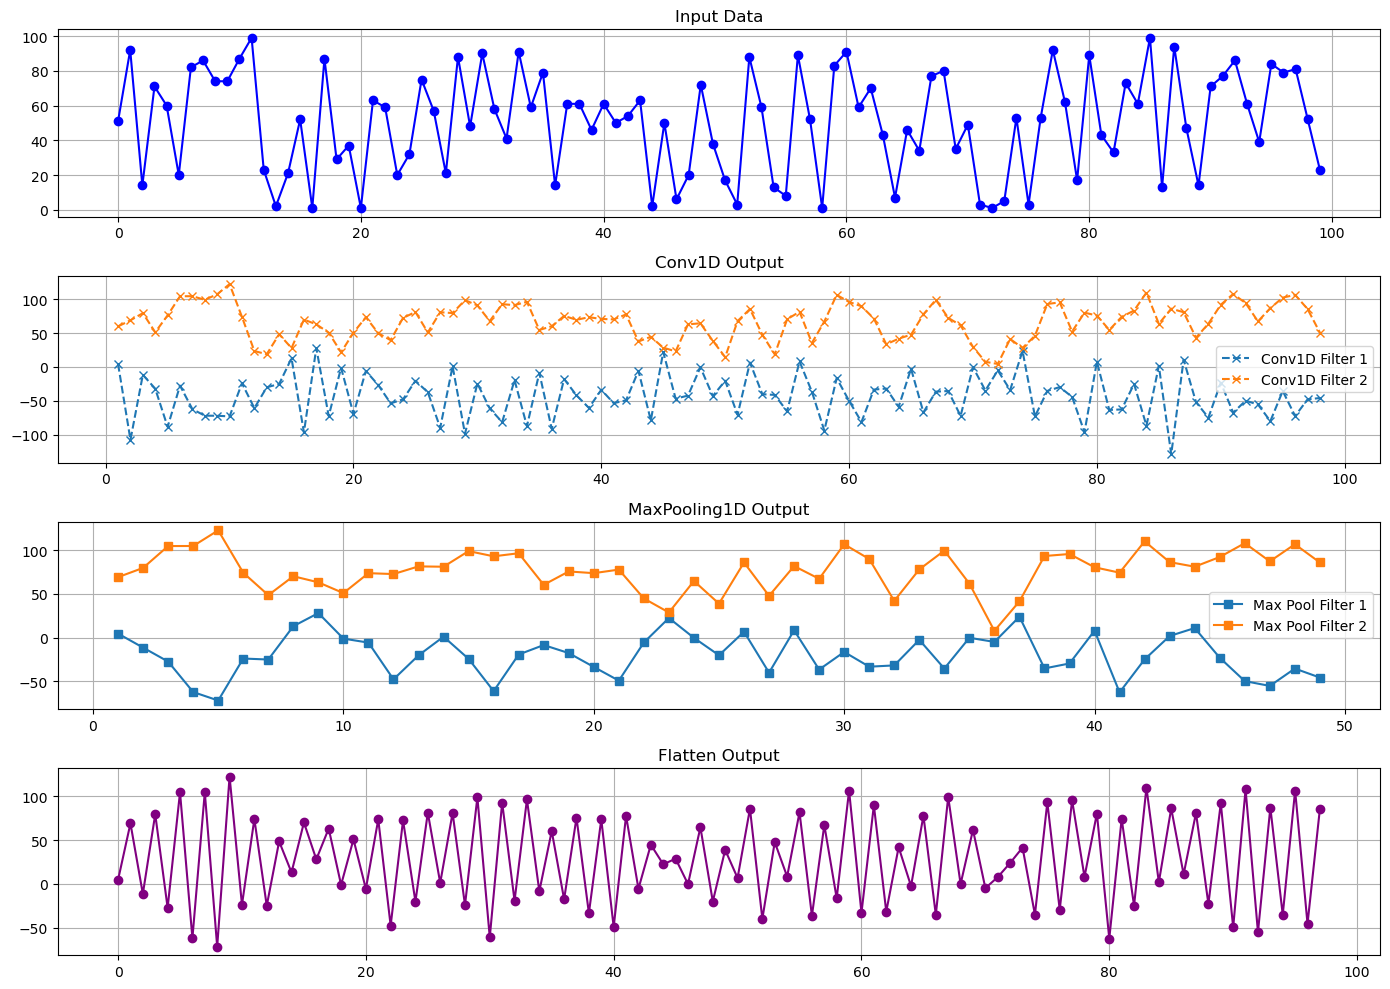

In [33]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt  # Import for plotting

# Set a seed for reproducibility of the random numbers
np.random.seed(42)

# Generate a 100x1 array of random integers between 0 and 99 (inclusive)
input_data = np.array([np.random.randint(0, 100, (100, 1))], dtype=np.float32)
print("Input data shape:", input_data.shape)

# Define a Conv1D layer with dilation_rate = 1 (regular convolution)
conv1d_layer = Conv1D(filters=2, kernel_size=3, strides=1, padding='valid', dilation_rate=1)

# Apply the Conv1D layer to the input data
conv_output = conv1d_layer(input_data)

# Add a MaxPooling1D layer to reduce the dimensionality
max_pool_layer = MaxPooling1D(pool_size=2, strides=2, padding='valid')

# Apply the MaxPooling layer to the Conv1D output
max_pool_output = max_pool_layer(conv_output)

# Add a Flatten layer to convert the pooled output to a 1D vector
flatten_layer = Flatten()

# Apply the Flatten layer to the MaxPooling output
flatten_output = flatten_layer(max_pool_output)

# Print the input and output shapes
print("Conv1D Output shape:", conv_output.shape)   # After convolution
print("Max Pooling Output shape:", max_pool_output.shape)  # After max-pooling
print("Flatten Output shape:", flatten_output.shape)  # After flattening

# Function to plot the input data, Conv1D output, Max-Pooling output, and Flatten output
def plot_conv1d_maxpool_flatten(input_data, conv_output, max_pool_output, flatten_output):
    input_data = input_data.squeeze()  # Remove the batch and channel dimensions for plotting
    conv_output = conv_output.numpy().squeeze()  # Convert TensorFlow tensor to NumPy array and squeeze
    max_pool_output = max_pool_output.numpy().squeeze()  # Squeeze max-pooling output
    flatten_output = flatten_output.numpy()  # Flatten output remains 1D

    plt.figure(figsize=(14, 10))
    
    # Plot input data
    plt.subplot(4, 1, 1)
    plt.plot(input_data, label='Input Data', marker='o', linestyle='-', color='blue')
    plt.title('Input Data')
    plt.grid(True)
    
    # Plot Conv1D output for each filter
    plt.subplot(4, 1, 2)
    for i in range(conv_output.shape[1]):
        plt.plot(range(1, len(conv_output)+1), conv_output[:, i], label=f'Conv1D Filter {i+1}', linestyle='--', marker='x')
    plt.title('Conv1D Output')
    plt.legend()
    plt.grid(True)
    
    # Plot MaxPooling1D output for each filter
    plt.subplot(4, 1, 3)
    for i in range(max_pool_output.shape[1]):
        plt.plot(range(1, len(max_pool_output)+1), max_pool_output[:, i], label=f'Max Pool Filter {i+1}', linestyle='-', marker='s')
    plt.title('MaxPooling1D Output')
    plt.legend()
    plt.grid(True)
    
    # Plot Flatten output
    plt.subplot(4, 1, 4)
    plt.plot(flatten_output.T, label='Flatten Output', linestyle='-', marker='o', color='purple')
    plt.title('Flatten Output')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_conv1d_maxpool_flatten(input_data, conv_output, max_pool_output, flatten_output)


### Average-pooling layer + Flatten layer

Input data shape: (1, 100, 1)
Conv1D Output shape: (1, 98, 2)
Average Pooling Output shape: (1, 49, 2)
Flatten Output shape: (1, 98)


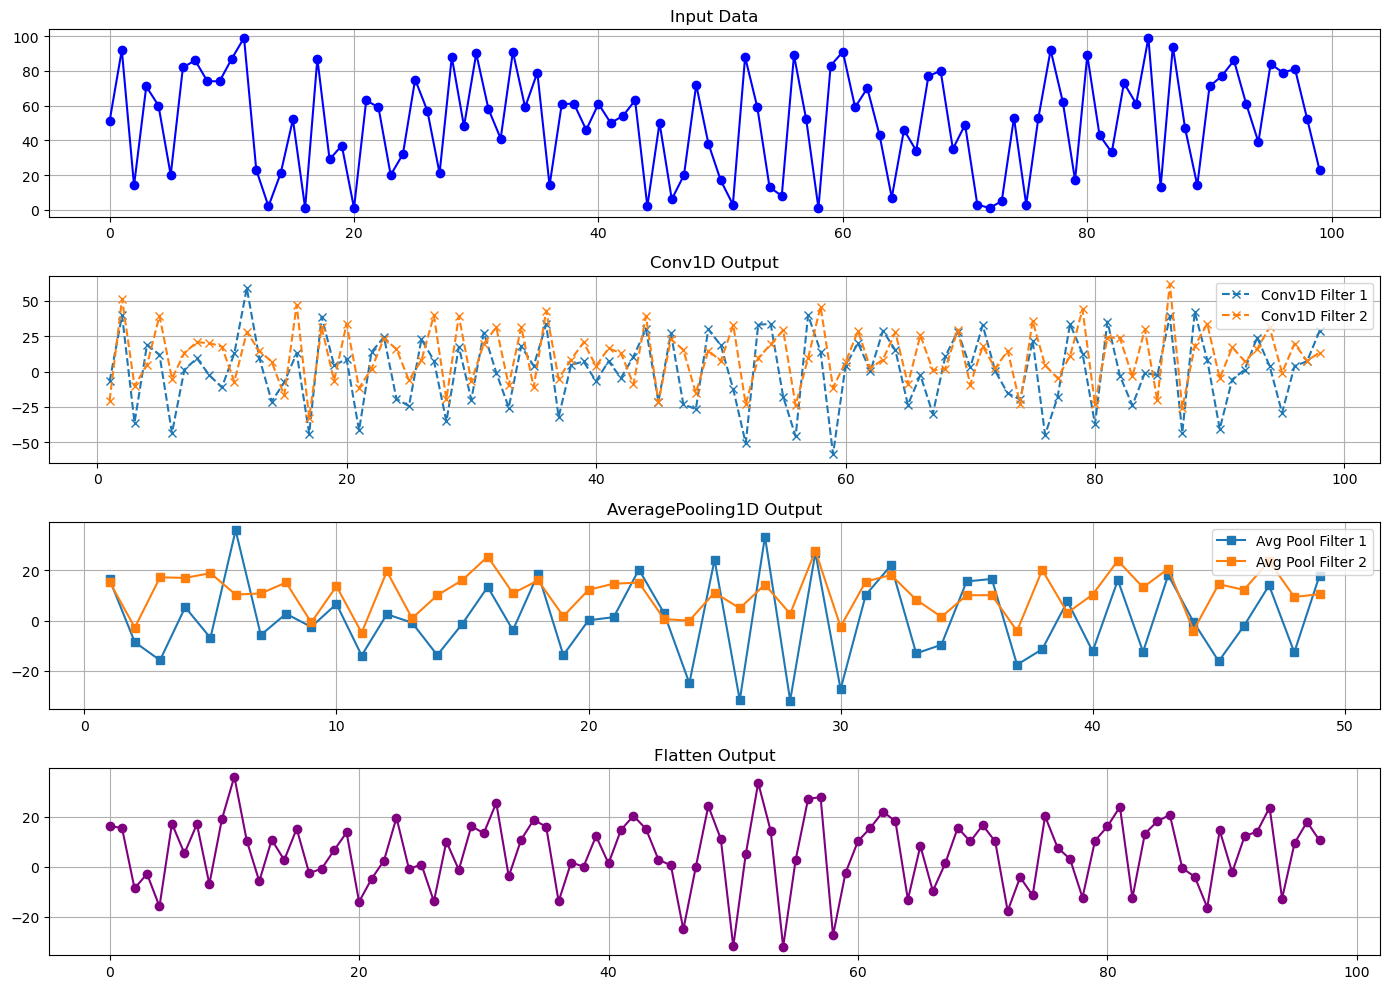

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, AveragePooling1D, Flatten
import matplotlib.pyplot as plt  # Import for plotting

# Set a seed for reproducibility of the random numbers
np.random.seed(42)

# Generate a 100x1 array of random integers between 0 and 99 (inclusive)
input_data = np.array([np.random.randint(0, 100, (100, 1))], dtype=np.float32)
print("Input data shape:", input_data.shape)

# Define a Conv1D layer with dilation_rate = 1 (regular convolution)
conv1d_layer = Conv1D(filters=2, kernel_size=3, strides=1, padding='valid', dilation_rate=1)

# Apply the Conv1D layer to the input data
conv_output = conv1d_layer(input_data)

# Add an AveragePooling1D layer to reduce the dimensionality
avg_pool_layer = AveragePooling1D(pool_size=2, strides=2, padding='valid')

# Apply the AveragePooling1D layer to the Conv1D output
avg_pool_output = avg_pool_layer(conv_output)

# Add a Flatten layer to convert the pooled output to a 1D vector
flatten_layer = Flatten()

# Apply the Flatten layer to the AveragePooling1D output
flatten_output = flatten_layer(avg_pool_output)

# Print the input, convolution, average pooling, and flatten output shapes
print("Conv1D Output shape:", conv_output.shape)   # After convolution
print("Average Pooling Output shape:", avg_pool_output.shape)  # After average pooling
print("Flatten Output shape:", flatten_output.shape)  # After flattening

# Function to plot the input data, Conv1D output, AveragePooling output, and Flatten output
def plot_conv1d_avgpool_flatten(input_data, conv_output, avg_pool_output, flatten_output):
    input_data = input_data.squeeze()  # Remove the batch and channel dimensions for plotting
    conv_output = conv_output.numpy().squeeze()  # Convert TensorFlow tensor to NumPy array and squeeze
    avg_pool_output = avg_pool_output.numpy().squeeze()  # Squeeze average pooling output
    flatten_output = flatten_output.numpy()  # Flatten output remains 1D, no need to squeeze

    plt.figure(figsize=(14, 10))
    
    # Plot input data
    plt.subplot(4, 1, 1)
    plt.plot(input_data, label='Input Data', marker='o', linestyle='-', color='blue')
    plt.title('Input Data')
    plt.grid(True)
    
    # Plot Conv1D output for each filter
    plt.subplot(4, 1, 2)
    for i in range(conv_output.shape[1]):
        plt.plot(range(1, len(conv_output)+1), conv_output[:, i], label=f'Conv1D Filter {i+1}', linestyle='--', marker='x')
    plt.title('Conv1D Output')
    plt.legend()
    plt.grid(True)
    
    # Plot AveragePooling1D output for each filter
    plt.subplot(4, 1, 3)
    for i in range(avg_pool_output.shape[1]):
        plt.plot(range(1, len(avg_pool_output)+1), avg_pool_output[:, i], label=f'Avg Pool Filter {i+1}', linestyle='-', marker='s')
    plt.title('AveragePooling1D Output')
    plt.legend()
    plt.grid(True)
    
    # Plot Flatten output
    plt.subplot(4, 1, 4)
    plt.plot(flatten_output.T, label='Flatten Output', linestyle='-', marker='o', color='purple')
    plt.title('Flatten Output')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_conv1d_avgpool_flatten(input_data, conv_output, avg_pool_output, flatten_output)


# Using UCI_HAR to pratice 1D CNN 
<a href="https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones">UCI_HAR dataset</a>

/var/folders/3g/q92cw_915295wqsy9xcqxx4c0000gn/T/ipykernel_20345/1666744332.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(prefix + 'UCI_HAR_Dataset/train/X_train.txt', header=None, delim_whitespace=True)
/var/folders/3g/q92cw_915295wqsy9xcqxx4c0000gn/T/ipykernel_20345/1666744332.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(prefix + 'UCI_HAR_Dataset/test/X_test.txt', header=None, delim_whitespace=True)
/var/folders/3g/q92cw_915295wqsy9xcqxx4c0000gn/T/ipykernel_20345/1666744332.py:19: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(prefix + 'UCI_HAR_Dataset/train/y_train.txt', header=None, delim_whitespace=True)
/var/folders/3g/q92cw_91

[0. 0. 0. 0. 0. 1. 0.]
X_train shape: (7352, 561)
X_test shape: (2947, 561)
y_train shape: (7352, 7)
y_test shape: (2947, 7)
Number of train classes: 7
Number of test classes: 7
Input shape: (561, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_26 (Conv1D)              │ (None, 559, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 279, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 277, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 138, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4416)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 140)            │       618,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 140)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           987 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 622,599 (2.38 MB)

 Trainable params: 622,599 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100


2024-10-13 21:19:47.435788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-10-13 21:19:47.437217: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


230/230 - 4s - 15ms/step - accuracy: 0.6051 - loss: 0.9785 - val_accuracy: 0.7798 - val_loss: 0.4968
Epoch 2/100
230/230 - 3s - 12ms/step - accuracy: 0.8128 - loss: 0.4888 - val_accuracy: 0.8639 - val_loss: 0.3325
Epoch 3/100
230/230 - 3s - 11ms/step - accuracy: 0.8648 - loss: 0.3560 - val_accuracy: 0.8999 - val_loss: 0.2588
Epoch 4/100
230/230 - 3s - 11ms/step - accuracy: 0.8807 - loss: 0.2970 - val_accuracy: 0.9084 - val_loss: 0.2318
Epoch 5/100
230/230 - 3s - 11ms/step - accuracy: 0.9072 - loss: 0.2500 - val_accuracy: 0.9155 - val_loss: 0.2045
Epoch 6/100
230/230 - 3s - 12ms/step - accuracy: 0.9131 - loss: 0.2261 - val_accuracy: 0.9155 - val_loss: 0.1963
Epoch 7/100
230/230 - 3s - 11ms/step - accuracy: 0.9215 - loss: 0.2034 - val_accuracy: 0.9067 - val_loss: 0.2097
Epoch 8/100
230/230 - 3s - 11ms/step - accuracy: 0.9308 - loss: 0.1828 - val_accuracy: 0.9328 - val_loss: 0.1722
Epoch 9/100
230/230 - 3s - 11ms/step - accuracy: 0.9310 - loss: 0.1751 - val_accuracy: 0.9243 - val_loss: 0.

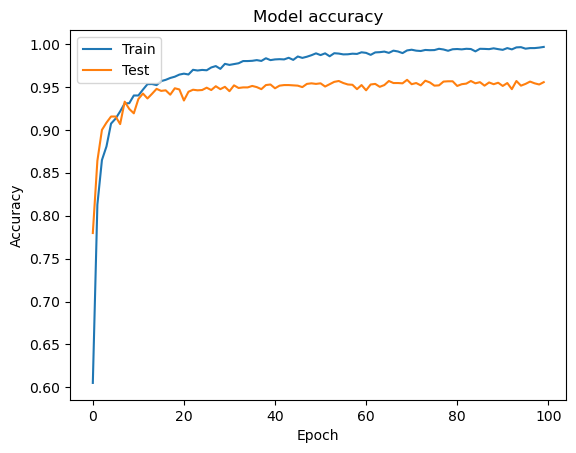

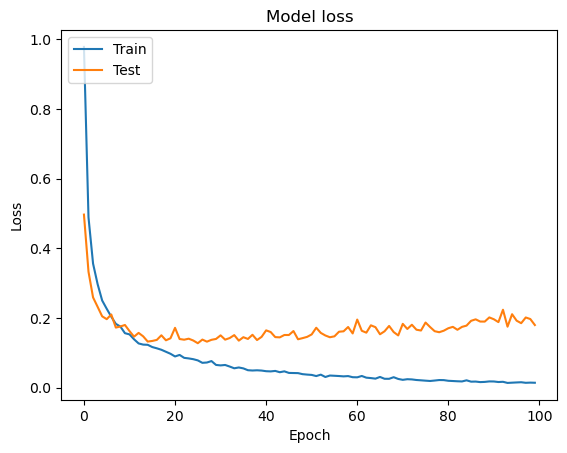

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
import random

# Function to load the dataset
def load_dataset(prefix=''):
    # Load the dataset
    df = pd.read_csv(prefix + 'UCI_HAR_Dataset/train/X_train.txt', header=None, delim_whitespace=True)
    X_train = df.values
    df = pd.read_csv(prefix + 'UCI_HAR_Dataset/test/X_test.txt', header=None, delim_whitespace=True)
    X_test = df.values
    df = pd.read_csv(prefix + 'UCI_HAR_Dataset/train/y_train.txt', header=None, delim_whitespace=True)
    y_train = df.values
    df = pd.read_csv(prefix + 'UCI_HAR_Dataset/test/y_test.txt', header=None, delim_whitespace=True)
    y_test = df.values
    return X_train, y_train, X_test, y_test

# Function to define the 1D CNN model
def CNN1D(input_shape, X_train, y_train, X_test, y_test):
    # Define the 1D CNN model
    model = Sequential()
    
    # Add 1D Convolutional layers
    model.add(Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))

    # model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Flatten())

    # Add a fully connected layer
    model.add(Dense(140, activation='relu'))
    model.add(Dropout(0.65))

    # Output layer (7 activities in total)
    model.add(Dense(7, activation='softmax'))
    opt = SGD(learning_rate=0.01)
    # Compile the model
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    # Summary of the model
    print(model.summary())
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    
    plot_training(history)

def plot_training(history):
    # Plotting training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plotting training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# Function to plot 20 random records from the dataset
def plot_random_records(X, y, num_samples=20):
    plt.figure(figsize=(20, 12))
    
    # Select 20 random indices from the dataset
    random_indices = random.sample(range(X.shape[0]), num_samples)
    
    # Plot the selected random records
    for i, idx in enumerate(random_indices):
        plt.plot(X[idx], label=f'Sample {i+1} - Class {int(y[idx][0])}')
    
    plt.title(f'Randomly Selected {num_samples} Samples from Dataset')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    # Load the dataset
    X_train, y_train, X_test, y_test = load_dataset("../data/")
    
    # Plot 20 random records from the dataset
    # plot_random_records(X, y, num_samples=20)

    # Normalize the dataset scikit-learn's StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # One-hot encode the target variable
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    print(y_test[0])
    
    # Print the shape of the training and testing sets
    print("X_train shape:", X_train.shape)
    print("X_test shape:", X_test.shape)
    print("y_train shape:", y_train.shape)
    print("y_test shape:", y_test.shape)
    
    # Print the number of classes in the dataset
    print("Number of train classes:", y_train.shape[1])
    print("Number of test classes:", y_test.shape[1])
    
    # Define the model
    input_shape = (X_train.shape[1], 1)
    print(f"Input shape: {input_shape}")
    CNN1D(input_shape, X_train, y_train, X_test, y_test)


## Using 1D CNN to train a model for mnist dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print( f"x_train data type: {x_train.dtype}")
print( x_train[0])

x_train data type: uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 1: Flatten the 28x28 images into 1D arrays (784,)
x_train = x_train.reshape(-1, 28*28)  # Flatten each image to a 784-length vector
x_test = x_test.reshape(-1, 28*28)

# Step 2: Reshape to have a single "channel" (for 1D CNN to work)
x_train = x_train.reshape(-1, 784, 1)  # (batch_size, 784, 1)
x_test = x_test.reshape(-1, 784, 1)

# Step 3: Define a simple 1D CNN model
input_layer = layers.Input(shape=(784, 1))

print( f"x_train shape: {x_train.shape}")
print( f"x_test shape: {x_test.shape}")
print( f"y_train shape: {y_train.shape}")
print( f"y_test shape: {y_test.shape}")
print( f"input layer shape: {input_layer.shape}")